# MVPT data

In [1]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
from scipy.optimize import minimize
import settings_mvpt_data as stg
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
np.set_printoptions(precision=5, suppress=True,
                    formatter={'float': lambda x: f'{x:6.3f}'})

In [2]:
import settings_mvpt_data as stg
from mvpt_data import MarkovitzPorffolioData

In [3]:
mpd = MarkovitzPorffolioData()

In [8]:
rets = mpd.dataframe()
rets.head()

AAPL.O    MSFT.O    INTC.O    AMZN.O       GLD
Date                                                        
2010-01-05  0.001727  0.000323 -0.000479  0.005883 -0.000911
2010-01-06 -0.016034 -0.006156 -0.003360 -0.018282  0.016365
2010-01-07 -0.001850 -0.010389 -0.009662 -0.017160 -0.006207
2010-01-08  0.006626  0.006807  0.011103  0.026717  0.004951
2010-01-11 -0.008861 -0.012802  0.005744 -0.024350  0.013202

In [9]:
pr = mpd.port_return(rets, stg.weights)
pr

0.15694764653018103

In [10]:
pv = mpd.port_volatility(rets, stg.weights)
pv

0.16106507848480675

In [11]:
psr = mpd.port_sharpe(rets, stg.weights)
psr

0.9744362217225497

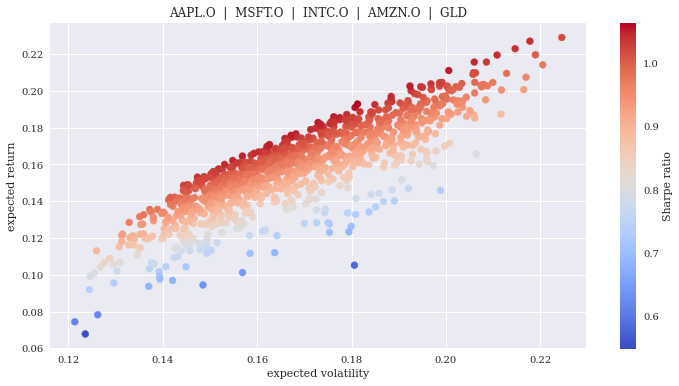

In [12]:
mcs = mpd.monte_carlo_simulation(rets)

In [15]:
evrs = mpd.expected_vs_realized_statistics()
evrs

epv       epr       esr       rpv       rpr       rsr
2011  0.157440  0.303003  1.924564  0.160622  0.133836  0.833235
2012  0.173279  0.169321  0.977156  0.182292  0.161375  0.885256
2013  0.202460  0.278459  1.375378  0.168714  0.166897  0.989228
2014  0.181544  0.368961  2.032353  0.197798  0.026830  0.135645
2015  0.160340  0.309486  1.930190  0.211368 -0.024560 -0.116194
2016  0.326730  0.778330  2.382179  0.296565  0.103870  0.350242
2017  0.106148  0.090933  0.856663  0.079521  0.230630  2.900235
2018  0.086548  0.260702  3.012226  0.157337  0.038234  0.243004
2019  0.323796  0.228008  0.704174  0.207672  0.275819  1.328147

In [19]:
evrs.mean()

epv    0.190920
epr    0.309689
esr    1.688320
rpv    0.184654
rpr    0.123659
rsr    0.838755
dtype: float64

In [20]:
evrs.corr()

epv       epr       esr       rpv       rpr       rsr
epv  1.000000  0.598752 -0.219618  0.765733  0.337420 -0.126618
epr  0.598752  1.000000  0.545738  0.857481 -0.350437 -0.531066
esr -0.219618  0.545738  1.000000  0.333468 -0.782995 -0.698607
rpv  0.765733  0.857481  0.333468  1.000000 -0.306776 -0.675333
rpr  0.337420 -0.350437 -0.782995 -0.306776  1.000000  0.809468
rsr -0.126618 -0.531066 -0.698607 -0.675333  0.809468  1.000000

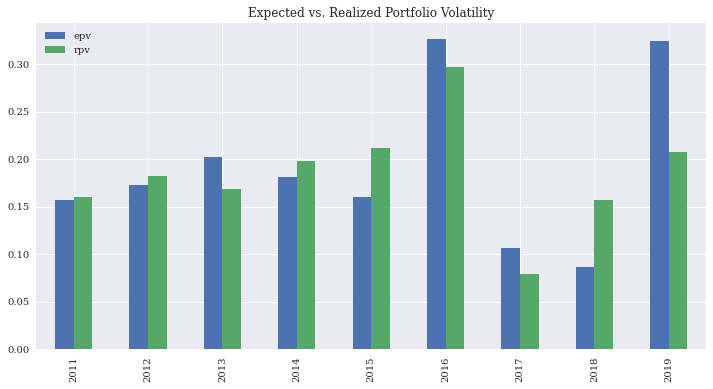

In [16]:
plot1 = mpd.EvRpv()

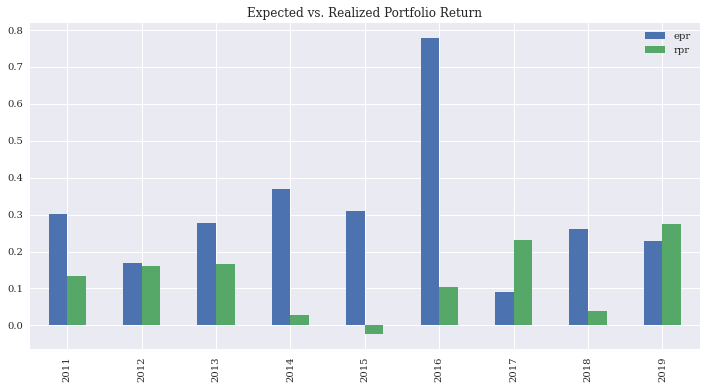

In [17]:
plot2 = mpd.EvRpr()

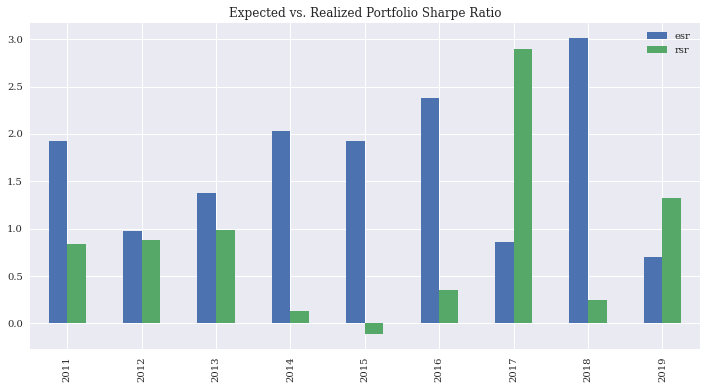

In [18]:
plot3 = mpd.EvRps()

### Predictive power of MVP Theory

MVP theory applied to real-world data reveals its practical shortcommings. 

Without additional constraints, optimal portfolios compositons and rebalancing can be extreme. 

The predictive power with regard to portfolio return and Sharpe ratio is pretty bad in the numerical example, whereas the predictive power with regards to portfolio risk seems acceptable. 

However, investors generally are interested in risk-adjusted performance measures, such as the Sharpe ratio, and this is the statistic for which MVP theory fails worst in the example.